<h1 style="font-size:3rem;color:orange;">Final</h1>

# Problem 2

This problem will examine the gene dataset from the
ISLRv2 textbook in the file gene data.csv. The data provides gene expression levels for 1000 different genes
and 40 individuals. The first 20 observations correspond to healthy patients and the last 20 observations
correspond to unhealthy patients. In this problem, you will perform unsupervised clustering to determine if
unsupervised methods are able to identify the difference between unhealthy and healthy patients (the models
in this part will not use information about patient health, only the gene expression levels). You do not need
to split into a training and validation set for this problem.

Load the data using read.csv. Note that this dataset is transposed: the individual observations are
along the columns, and the rows give the different gene features. To correctly prepare the data, you
will need to use the header=FALSE argument in read.csv since there are no column names included,
then tranpose the data (switch rows and columns) using the command

data = t(data)

Prepare the data by standardizing each feature to have mean 0 and variance 1.

In [12]:
#%% Import and Split Data
import pandas as pa;

file_path = 'C:/Users/danma/Desktop/Personal Documents/UCF/STA 4365/final/gene_data.csv'
df = pa.read_csv(file_path, header=None)
#transpose
df = df.transpose()

from sklearn.preprocessing import StandardScaler
#standardize
scalar = StandardScaler()
scalar.fit(df)

df = scalar.transform(df)

print("DataFrame Output:\n",df)

DataFrame Output:
 [[-1.2495606  -0.09406847  0.33453569 ... -2.30287954  1.3350603
   0.95588895]
 [ 0.41434763 -1.01894494 -0.98480643 ...  0.41463477  1.20766973
   1.00569544]
 [-1.26505505  0.43935912  0.68771226 ...  1.52333169  0.36646972
   0.51326088]
 ...
 [ 0.44557465 -0.36689525  0.48760526 ... -0.53998598 -0.71956787
  -0.44515195]
 [ 1.14842695  0.56726689  0.0399355  ...  0.12012878 -0.97628906
  -0.17562074]
 [ 1.85355167 -1.17744533 -0.50673277 ...  1.10211355 -1.30769429
   0.38113747]]


Learn a K-means model using k = 2 clusters. Report the proportion of healthy and unhealthy patients
in each cluster. Were the unsupervised methods able to distinguish between the two groups without
knowing any labels?


In [13]:
#%% K-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
clst = kmeans.labels_

print("clusters:",clst)

import numpy as np
true_class = np.array(['1']*20 + ['0']*20, dtype=int)

tab = pa.crosstab(clst, true_class, rownames = ['cluster'], colnames = ['true_class']);
print("\n",tab)

clusters: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

 true_class   0   1
cluster           
0            0  20
1           20   0


<b style="font-size:1.5rem;color:red;">All are perfectly clustered.</b>

Visualize your K-means model by making two 2D plots of the data: one using the first two principal
components from PCA, and another using t-SNE. You can use the same t-SNE parameters that were
used in HW3 (perplexity of 30 and PCA pre-processing using 50 dimensions). Make a plot for each
visualization method and color-code each observation according to the k-means labels.


C:\Users\danma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


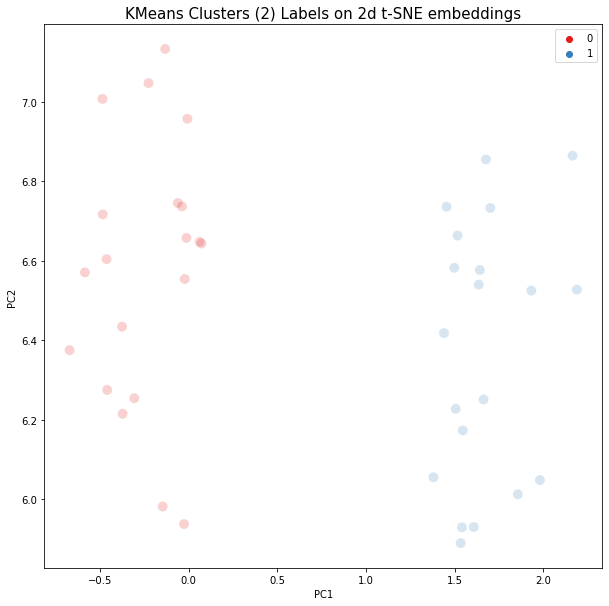

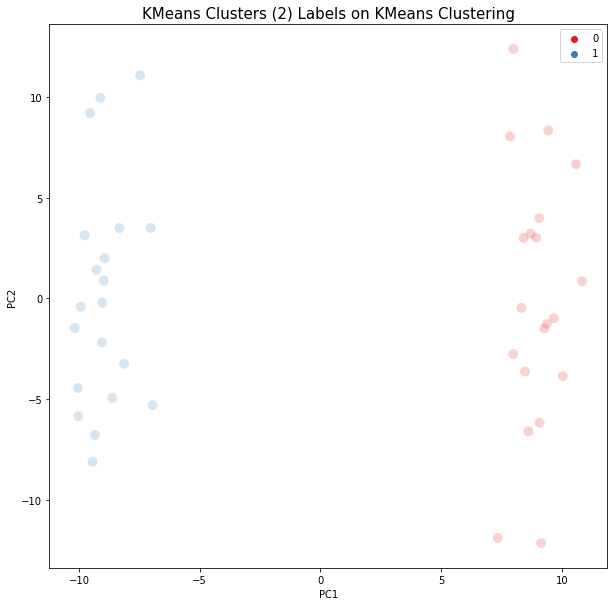

In [14]:
#%% Plotting with TSNE

from sklearn.decomposition import PCA

pca = PCA(n_components=40)

principalComponents = pca.fit_transform(df)
principalDf = pa.DataFrame(principalComponents)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca')
tsne_proj = tsne.fit_transform(principalDf)

embeddingsdf = pa.DataFrame()
embeddingsdf['x'] = tsne_proj[:,0]
embeddingsdf['y'] = tsne_proj[:,1]
embeddingsdf.head()

###PLOT FIGURES FOR TSNE

import seaborn as sns
from matplotlib import pyplot as plt

labels_scale = clst

plt.figure(figsize = (10,10))
sns.scatterplot(x=tsne_proj[:,0], y=tsne_proj[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (2) Labels on 2d t-SNE embeddings', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

###PLOT FIGURES FOR KMEANS
pca = PCA(2)
df2 = pca.fit_transform(df)

kmeans = KMeans(n_clusters=2, random_state=0)
label = kmeans.fit_predict(df2)

labels_scale = clst

plt.figure(figsize = (10,10))
sns.scatterplot(x=df2[:,0], y=df2[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (2) Labels on KMeans Clustering', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

<b style="font-size:1.5rem;color:red;">All are perfectly clustered just as in part (b) and just as in part (b) one can see that the clusters are mislabeled in KMeans.</b>